# Importing all necessary libraries

In [1]:
#importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Data description
pregnant women health risk depends on some attributes which implies the health risk such as blood pressurem age, heart rate etc. this data has been collected from different healthcare facilities through the Internet-of-Things-based risk monitoring system (data source: https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data/data).

Data columns are all included-
Age: Age in years when a woman is pregnant.
SystolicBP: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
DiastolicBP: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
BS: Blood glucose levels is in terms of a molar concentration, mmol/L.
HeartRate: A normal resting heart rate in beats per minute.
Risk Level: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

##### --Here Risk level has defined into high, medium nad low according to other attributes. High risk seems the health in high risk zone or in danger zone.
##### --Normal Systolic bp range is  110 to 139 and Distolic bp is  70 to 89. 
##### --Normal blood glucose level is (3.3-8) including before, after 1 hour and after 2 hours of meal.
According to a study(https://www.medicalnewstoday.com/articles/heart-rate-during-pregnancy)- 
##### --the average heart rate rises steadily through pregnancy. At 10 weeks, the average heart rate was 79.3 BPM. By 40 weeks, the average rate was 86.9 BPM.at conclusion, the heart rate maintains a normal range throught the pregnancy 79-87.


In [2]:
#calling dataset and read by pandas
maternal_data=pd.read_csv("Maternal Health Risk Data Set.csv")
maternal_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


# Exploratory Data Analysis

In [3]:
maternal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [4]:
maternal_data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [5]:
maternal_data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [6]:
maternal_data["RiskLevel"].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [7]:
maternal_data.describe(include=object)

,RiskLevel
count,1014
unique,3
top,low risk
freq,406


In [8]:
#Data cleaning
maternal_data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
maternal_data['RiskLevel']=labelencoder.fit_transform(maternal_data['RiskLevel'])
maternal_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,0
1010,55,120,90,18.0,98.0,60,0
1011,35,85,60,19.0,98.0,86,0
1012,43,120,90,18.0,98.0,70,0


# Feature Engineering

Distribution on the basis of skewness value:

Skewness = 0: Then normally distributed.
Skewness > 0: Then more weight in the left tail of the distribution.
Skewness < 0: Then more weight in the right tail of the distribution.
Kurtosis:
It is also a statistical term and an important characteristic of frequency distribution. It determines whether a distribution is heavy-tailed in respect of the normal distribution. It provides information about the shape of a frequency distribution.

kurtosis for normal distribution is equal to 3.
For a distribution having kurtosis < 3: It is called playkurtic.
For a distribution having kurtosis > 3, It is called leptokurtic and it signifies that it tries to produce more outliers rather than the normal distribution.

In [10]:
#data skewness
from scipy.stats import skew
print(skew(maternal_data,axis=0,bias=True))

[ 0.78190463 -0.25081758 -0.04836908  1.86543792  1.74839722 -1.04198095
 -0.10858749]


In [11]:
#data kurtosis
from scipy.stats import kurtosis
print(kurtosis(maternal_data,axis=0,bias=True))

[-0.39539824 -0.61627319 -0.94987454  2.28592154  1.43862075  8.35160179
 -1.31450575]


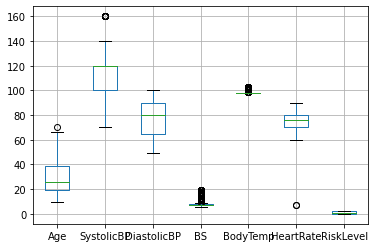

In [12]:
#outlier detection
maternal_data.boxplot()
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BodyTemp'>

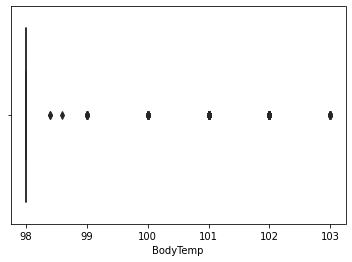

In [13]:
sns.boxplot(maternal_data[ 'BodyTemp'],color="green")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BS'>

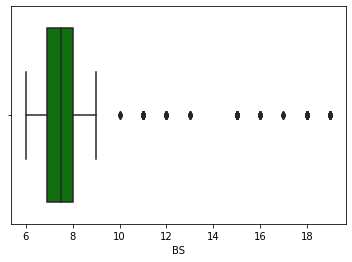

In [14]:
sns.boxplot(maternal_data[ 'BS'],color="green")

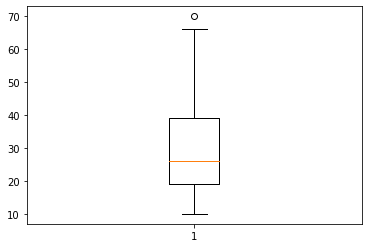

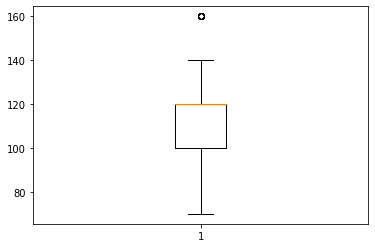

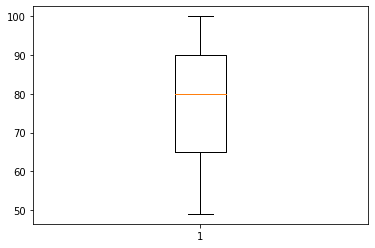

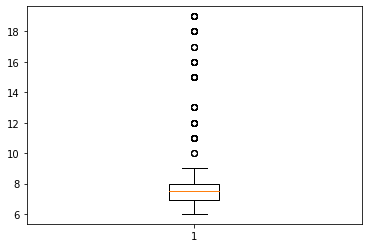

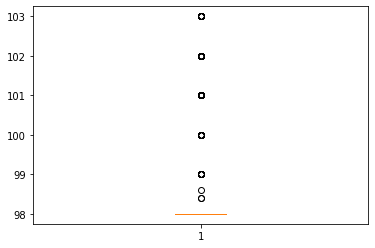

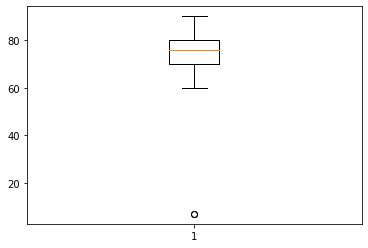

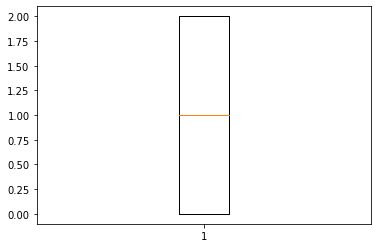

In [15]:
columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel']
for col in columns:
    plt.figure()   # plots figure for each iteration
    plt.boxplot(maternal_data[col])

In [16]:
Q1 = np.percentile(maternal_data[ 'BS'], 25)
Q3 = np.percentile(maternal_data[ 'BS'], 75)
IQR = Q3 - Q1
print(IQR)

1.0999999999999996


In [17]:
upper = Q3+1.5*IQR
upper_array = np.array(maternal_data[ 'BS'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())
 
# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(maternal_data[ 'BS'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 9.649999999999999
210
Lower Bound: 5.250000000000001
0


In [18]:
maternal_data.shape

(1014, 7)

In [19]:
# Calculate the upper and lower limits
Q1 = maternal_data[ 'BS'].quantile(0.25)
Q3 = maternal_data[ 'BS'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(maternal_data[ 'BS'] >= upper)[0]
lower_array = np.where(maternal_data[ 'BS'] <= lower)[0]
 
# Removing the outliers
maternal_data.drop(index=upper_array, inplace=True)
maternal_data.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", maternal_data.shape)

New Shape:  (804, 7)


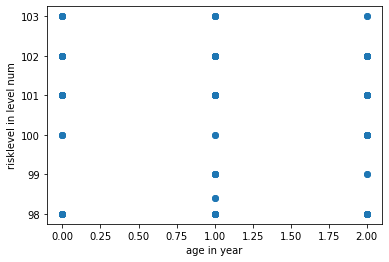

In [20]:
#check linearity of data within target data
plt.scatter(maternal_data['RiskLevel'],maternal_data[ 'BodyTemp'])
plt.xlabel("age in year")
plt.ylabel("risklevel in level num")
plt.show()

# correlation

In [21]:
maternal_data.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.273235,0.243645,-0.020887,-0.194617,0.021498,-0.028759
SystolicBP,0.273235,1.000000,0.738602,-0.072467,-0.223301,-0.131444,-0.016481
DiastolicBP,0.243645,0.738602,1.000000,0.079557,-0.194805,-0.150042,-0.134336
BS,-0.020887,-0.072467,0.079557,1.000000,0.170167,0.033741,-0.170186
BodyTemp,-0.194617,-0.223301,-0.194805,0.170167,1.000000,0.161745,-0.060654
HeartRate,0.021498,-0.131444,-0.150042,0.033741,0.161745,1.000000,0.015310
RiskLevel,-0.028759,-0.016481,-0.134336,-0.170186,-0.060654,0.015310,1.000000


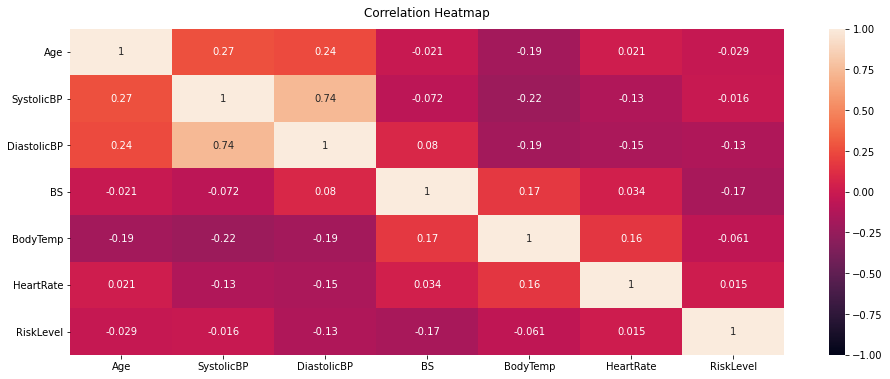

In [22]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(maternal_data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Vizualisation

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BS', ylabel='count'>

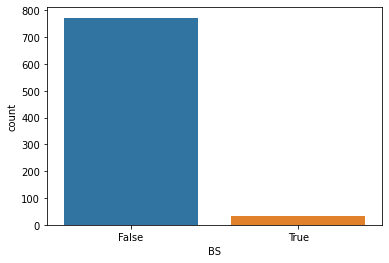

In [23]:
#
sns.countplot(maternal_data[ 'BS']>8)


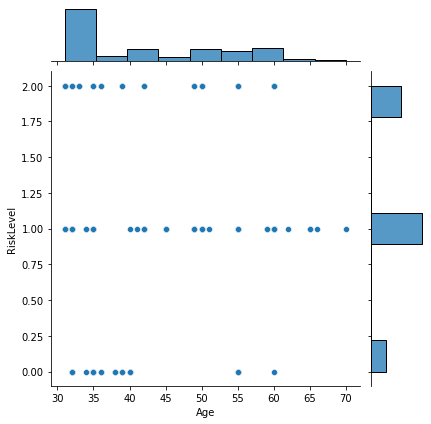

In [24]:
sns.jointplot(x='Age', y= 'RiskLevel', data=maternal_data[maternal_data['Age'] > 30])

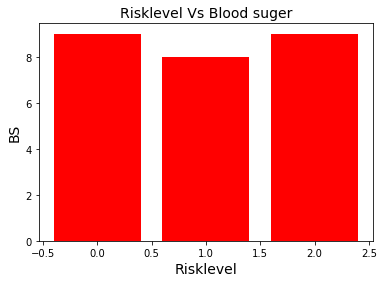

In [25]:
plt.bar(maternal_data[ 'RiskLevel'],maternal_data[ 'BS'] , color='red')
plt.title('Risklevel Vs Blood suger', fontsize=14)
plt.xlabel('Risklevel', fontsize=14)
plt.ylabel('BS', fontsize=14)
plt.grid(False)
plt.show()

In [26]:
maternal_data[ 'RiskLevel'].value_counts()

1    402
2    304
0     98
Name: RiskLevel, dtype: int64

In [27]:
maternal_data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

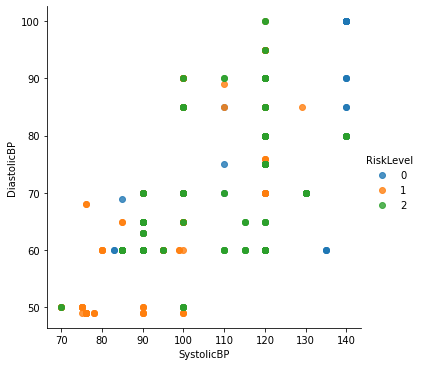

In [28]:
sns.lmplot(x= 'SystolicBP', y= 'DiastolicBP', hue= 'RiskLevel', 
           data=maternal_data.loc[maternal_data[ 'RiskLevel'].isin([0,1,2])], 
           fit_reg=False)

# Modeling

In [32]:
#split data into dependent and independent dataset
x=maternal_data.drop([ 'RiskLevel'],axis=1)
y=maternal_data[ 'RiskLevel']

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [47]:
#implement decision tree
# Create Decision Tree classifer object
Decission_tree = DecisionTreeClassifier()

# Train Decision Tree Classifer
Decission_tree = Decission_tree.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = Decission_tree.predict(x_test)

In [49]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.768595041322314


In [51]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7231404958677686


Random forest classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
Random_forest=RandomForestClassifier()
Random_forest=Random_forest.fit(x_train,y_train)
y_pred_random=Random_forest.predict(x_test)
accuracy_random=metrics.accuracy_score(y_test, y_pred)

In [59]:
accuracy_random

0.7231404958677686